In [1]:
import sys
import os
sys.path.append('/home/daniele/Documents/Research/gphht')
import pandas as pd
import pickle as pk
import time
import yaml
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from scipy.signal import welch
from scipy.stats import entropy
from scipy.cluster.hierarchy import fcluster
from sklearn.neighbors import KernelDensity as KDE
from IPython.display import Image
from pyhht.visualization import plot_imfs
from pyhht.emd import EmpiricalModeDecomposition
from IPython.display import clear_output
jtplot.style()

Import some dataset, in this case a bunch of economic indicators, and compute the performance and convergence properties of the modified EMD

In [2]:
indicators = pd.read_csv('Clean_fields_1Q_pct_change_backward_continuation_1969-2019.csv', index_col=0)

In [17]:
theta_1 = 0.01; theta_2 = 0.1; alpha = 0.05; ndirs = 4; fixe = 0; fixe_h = 0; 
n_imfs = 0; nbsym = 0; bivariate_mode = 'bbox_center'; envelope_method = 'gaussian_process'; gp_kernel = None
x = indicators.iloc[:,2].values
time_gp = []
num_imfs_gp = []
time_spl = []
num_imfs_spl = []

miters = [mi for mi in range(2,8,1)]
for mi in miters:
    maxiter = 2**mi
    tic = time.time()
    decomposer = EmpiricalModeDecomposition(x, None, theta_1, theta_2, alpha, ndirs, fixe, maxiter, fixe_h, n_imfs, nbsym, bivariate_mode, envelope_method)
    imfs = decomposer.decompose();
    time_gp += [time.time()-tic]
    num_imfs_gp += [imfs.shape[0]]
    tic = time.time()
    decomposer = EmpiricalModeDecomposition(x, None, theta_1, theta_2, alpha, ndirs, fixe, maxiter, fixe_h, n_imfs, nbsym, bivariate_mode, 'spline')
    imfs = decomposer.decompose();
    time_spl += [time.time()-tic]
    num_imfs_spl += [imfs.shape[0]]


/home/daniele/Documents/Research/gphht/pyhht/emd.py:462: RuntimeWarning: invalid value encountered in true_divide
  sx = np.abs(envmoy) / amp
/home/daniele/Documents/Research/gphht/pyhht/emd.py:463: RuntimeWarning: invalid value encountered in greater
  stop = not(((np.mean(sx > self.threshold_1) > self.alpha) or
/home/daniele/Documents/Research/gphht/pyhht/emd.py:462: RuntimeWarning: divide by zero encountered in true_divide
  sx = np.abs(envmoy) / amp
/home/daniele/Documents/Research/gphht/pyhht/emd.py:464: RuntimeWarning: invalid value encountered in greater
  np.any(sx > self.threshold_2)) and np.all(nem > 2))


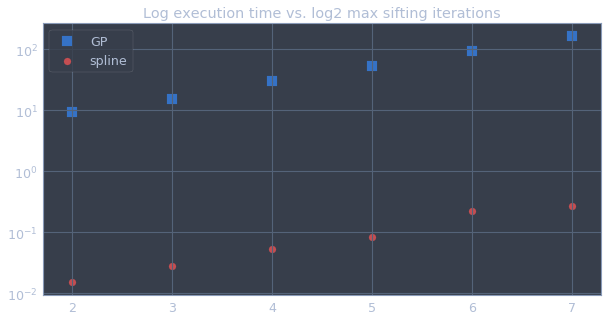

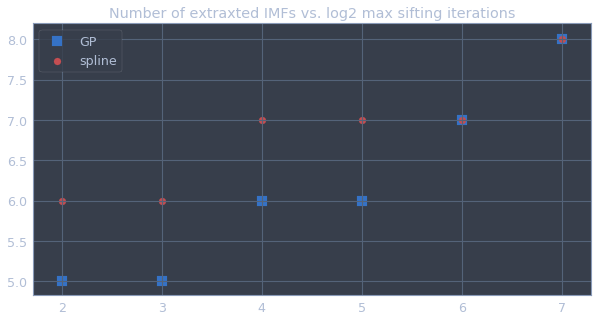

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(miters, time_gp, label='GP', marker='s', s=100)
plt.yscale('log')
plt.scatter(miters, time_spl, label='spline', color='r', s=50)
plt.title('Log execution time vs. log2 max sifting iterations');
plt.legend();

plt.figure(figsize=(10,5))
plt.scatter(miters, num_imfs_gp, label='GP', marker='s', s=100)
plt.scatter(miters, num_imfs_spl, label='spline', color='r', s=50)
plt.title('Number of extraxted IMFs vs. log2 max sifting iterations');
plt.legend();